In [1]:
from pathlib import Path
import numpy as np
import time
import pandas as pd

# Download the data

In [2]:
# Download
#! wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

# Unzip
#! tar -xvf aclImdb_v1.tar.gz

# Check
# ! ls aclImdb/

# Getting the data

In [3]:
def read_file(path):
    f = open(path, "r")
    return f.read()

train_path = Path("aclImdb/train/")
train_pos_paths = [f for f in (train_path/"pos").iterdir()]
len(train_pos_paths)

12500

In [4]:
train_neg_paths = [f for f in (train_path/"neg").iterdir()]
len(train_neg_paths)

12500

In [5]:
test_path = Path("aclImdb/test/")
test_pos_paths = [f for f in (test_path/"pos").iterdir()]
len(test_pos_paths)


12500

In [6]:
test_neg_paths = [f for f in (test_path/"neg").iterdir()]
len(test_neg_paths)

12500

# Labeling

In [7]:
train_pos_text = [(read_file(path), 'pos', 'train') for path in train_pos_paths] 
train_pos_text[0]

('For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.',
 'pos',
 'train')

In [8]:
train_neg_text = [(read_file(path), 'neg', 'train') for path in train_neg_paths] 
train_neg_text[0]

("Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.",
 'neg',
 'train')

In [9]:
test_neg_text = [(read_file(path), 'neg', 'test') for path in test_neg_paths] 
test_neg_text[0]

("Alan Rickman & Emma Thompson give good performances with southern/New Orleans accents in this detective flick. It's worth seeing for their scenes- and Rickman's scene with Hal Holbrook. These three actors mannage to entertain us no matter what the movie, it seems. The plot for the movie shows potential, but one gets the impression in watching the film that it was not pulled off as well as it could have been. The fact that it is cluttered by a rather uninteresting subplot and mostly uninteresting kidnappers really muddles things. The movie is worth a view- if for nothing more than entertaining performances by Rickman, Thompson, and Holbrook.",
 'neg',
 'test')

In [10]:
test_pos_text = [(read_file(path), 'pos', 'test') for path in test_pos_paths] 
test_pos_text[0]

('Based on an actual story, John Boorman shows the struggle of an American doctor, whose husband and son were murdered and she was continually plagued with her loss. A holiday to Burma with her sister seemed like a good idea to get away from it all, but when her passport was stolen in Rangoon, she could not leave the country with her sister, and was forced to stay back until she could get I.D. papers from the American embassy. To fill in a day before she could fly out, she took a trip into the countryside with a tour guide. "I tried finding something in those stone statues, but nothing stirred in me. I was stone myself." <br /><br />Suddenly all hell broke loose and she was caught in a political revolt. Just when it looked like she had escaped and safely boarded a train, she saw her tour guide get beaten and shot. In a split second she decided to jump from the moving train and try to rescue him, with no thought of herself. Continually her life was in danger. <br /><br />Here is a woman

In [11]:
all_text = train_neg_text + train_pos_text + test_neg_text + test_pos_text
all_text[0]

("Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.",
 'neg',
 'train')

# Creating the df and tokenizing

In [12]:
# Create DataFrame
df = pd.DataFrame(all_text, columns=['sentence', 'sentiment', 'train_test'])

df.head()

,sentence,sentiment,train_test
0,Working with one of the best Shakespeare sourc...,neg,train
1,"Well...tremors I, the original started off in ...",neg,train
2,Ouch! This one was a bit painful to sit throug...,neg,train
3,"I've seen some crappy movies in my life, but t...",neg,train
4,"""Carriers"" follows the exploits of two guys an...",neg,train


In [13]:
import pandas as pd
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Preprocess the text
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words and w.isalpha()]
    return filtered_sentence

# Apply preprocessing to each sentence in the DataFrame
df['preprocessed'] = df['sentence'].apply(preprocess)

# Extract sentences for Word2Vec training
preprocessed_sentences = df['preprocessed'].tolist()

df

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/erenbardak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/erenbardak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sentence,sentiment,train_test,preprocessed
0,Working with one of the best Shakespeare sourc...,neg,train,"[working, one, best, shakespeare, sources, fil..."
1,"Well...tremors I, the original started off in ...",neg,train,"[well, tremors, original, started, found, movi..."
2,Ouch! This one was a bit painful to sit throug...,neg,train,"[ouch, one, bit, painful, sit, cute, amusing, ..."
3,"I've seen some crappy movies in my life, but t...",neg,train,"[seen, crappy, movies, life, one, must, among,..."
4,"""Carriers"" follows the exploits of two guys an...",neg,train,"[carriers, follows, exploits, two, guys, two, ..."
...,...,...,...,...
49995,"This movie is certainly well-constructed, begi...",pos,test,"[movie, certainly, beginning, ending, dark, fo..."
49996,Nice to see a comedy for grown ups. Masterfull...,pos,test,"[nice, see, comedy, grown, ups, masterfully, s..."
49997,Jean Renoir's homage to the Paris of the late ...,pos,test,"[jean, renoir, homage, paris, late, century, b..."
49998,What are the movies? I mean.. what are movies ...,pos,test,"[movies, mean, movies, made, shootings, killin..."


# Model

- experimenting with the hyperparameters

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Function to create a feature vector for a sentence by averaging its word vectors
def feature_vector(sentence, model):
    # Convert the sentence to a vector
    words = sentence
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    
    # If a sentence has no words that are in the Word2Vec vocab, return a zero vector
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    
    # Otherwise, return the mean of the word vectors
    return np.mean(word_vectors, axis=0)

# Define hyperparameters ranges for Word2Vec
vector_sizes = [50, 100, 150]
window_sizes = [3, 5, 7]
epochs_list = [5, 10, 15]

results = {}

# Iterate over combinations of hyperparameters
for vector_size in vector_sizes:
    for window_size in window_sizes:
        for epochs in epochs_list:

            # Train the Word2Vec model using the preprocessed text from the 'preprocessed' column
            model = Word2Vec(sentences=df['preprocessed'], vector_size=100, window=5, min_count=1, workers=4)
            sentences=df['preprocessed']
            model.train(sentences, total_examples=len(sentences), epochs=epochs)


            # Create feature vectors for each sentence
            df['feature_vector'] = df['preprocessed'].apply(lambda x: feature_vector(x, model))

            df_train = df[df['train_test']=='train']
            df_test = df[df['train_test']=='test']

            # Prepare the training data and labels
            x_train = np.array(list(df_train['feature_vector'])) # This creates a 2D numpy array from the feature vectors
            y_train = df_train['sentiment'].apply(lambda x: 1 if x == 'pos' else 0).values # Convert sentiment to a binary variable

            x_test = np.array(list(df_test['feature_vector'])) # This creates a 2D numpy array from the feature vectors
            y_test = df_test['sentiment'].apply(lambda x: 1 if x == 'pos' else 0).values # Convert sentiment to a binary variable

            # Scale your data
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(x_train)
            X_test_scaled = scaler.transform(x_test)

            # Train a classifier with increased max_iter and a different solver
            clf = LogisticRegression(random_state=0, max_iter=1000, tol=1e-3, solver='lbfgs')

            clf.fit(X_train_scaled, y_train)

            y_pred = clf.predict(X_test_scaled)

            accuracy = accuracy_score(y_test, y_pred)
            print(f"Accuracy: VS{vector_size}_WS{window_size}_E{epochs}: {accuracy}")

            key = f'VS{vector_size}_WS{window_size}_E{epochs}'
            results[key] = accuracy

Accuracy: VS50_WS3_E5: 0.84672
Accuracy: VS50_WS3_E10: 0.8554
Accuracy: VS50_WS3_E15: 0.85824
Accuracy: VS50_WS5_E5: 0.84796
Accuracy: VS50_WS5_E10: 0.85432
Accuracy: VS50_WS5_E15: 0.85968
Accuracy: VS50_WS7_E5: 0.8494
Accuracy: VS50_WS7_E10: 0.85524
Accuracy: VS50_WS7_E15: 0.8576
Accuracy: VS100_WS3_E5: 0.84636
Accuracy: VS100_WS3_E10: 0.85552
Accuracy: VS100_WS3_E15: 0.857
Accuracy: VS100_WS5_E5: 0.84916
Accuracy: VS100_WS5_E10: 0.8554
Accuracy: VS100_WS5_E15: 0.85832
Accuracy: VS100_WS7_E5: 0.84804
Accuracy: VS100_WS7_E10: 0.85312
Accuracy: VS100_WS7_E15: 0.86008
Accuracy: VS150_WS3_E5: 0.84936
Accuracy: VS150_WS3_E10: 0.85596
Accuracy: VS150_WS3_E15: 0.85884
Accuracy: VS150_WS5_E5: 0.84792
Accuracy: VS150_WS5_E10: 0.85624
Accuracy: VS150_WS5_E15: 0.85784
Accuracy: VS150_WS7_E5: 0.84708
Accuracy: VS150_WS7_E10: 0.85516
Accuracy: VS150_WS7_E15: 0.85832


/var/folders/g8/btdyhprd6l7_z7kmyr6qhzp80000gn/T/ipykernel_55593/3221311349.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90)


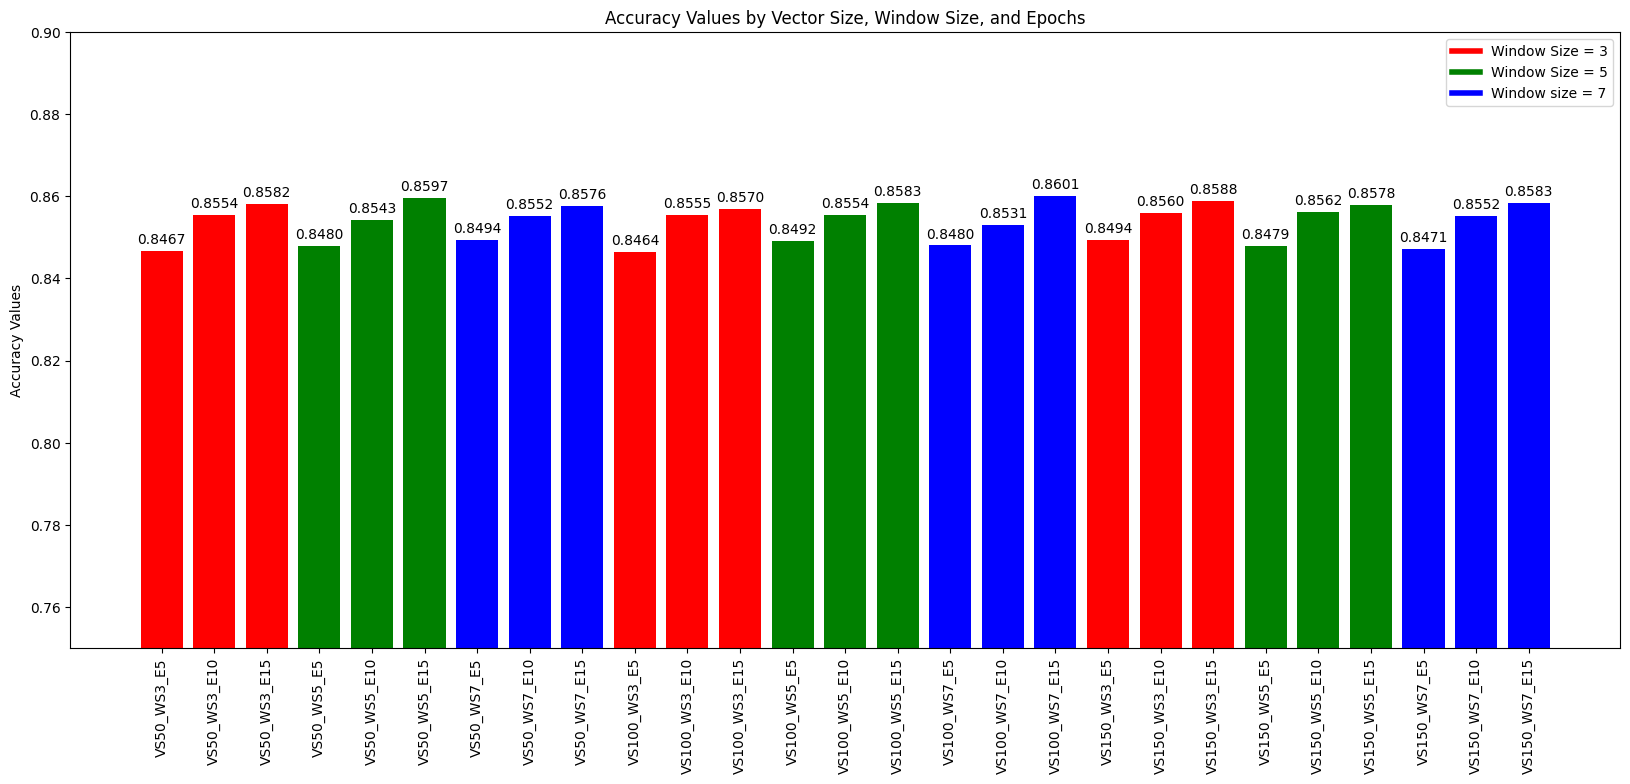

In [20]:
# Extracting VS, WS, and E values
labels = list(results.keys())
values = list(results.values())

# Color mapping based on WS value
colors = {'WS3': 'red', 'WS5': 'green', 'WS7': 'blue'}
color_list = [colors[label.split('_')[1]] for label in labels]

# Creating the plot
fig, ax = plt.subplots(figsize=(20, 8))
bars = ax.bar(labels, values, color=color_list)
ax.set_ylabel('Accuracy Values')
ax.set_title('Accuracy Values by Vector Size, Window Size, and Epochs')
ax.set_xticklabels(labels, rotation=90)

# Annotate the accuracy value on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Creating a legend for the different WS values
red_patch = plt.Line2D([0], [0], color='red', lw=4, label='Window Size = 3')
green_patch = plt.Line2D([0], [0], color='green', lw=4, label='Window Size = 5')
blue_patch = plt.Line2D([0], [0], color='blue', lw=4, label='Window size = 7')

plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.ylim(0.75, 0.90)  # Adjust the upper limit to accommodate the text

plt.show()

- Creating t-SNE using one of the models above

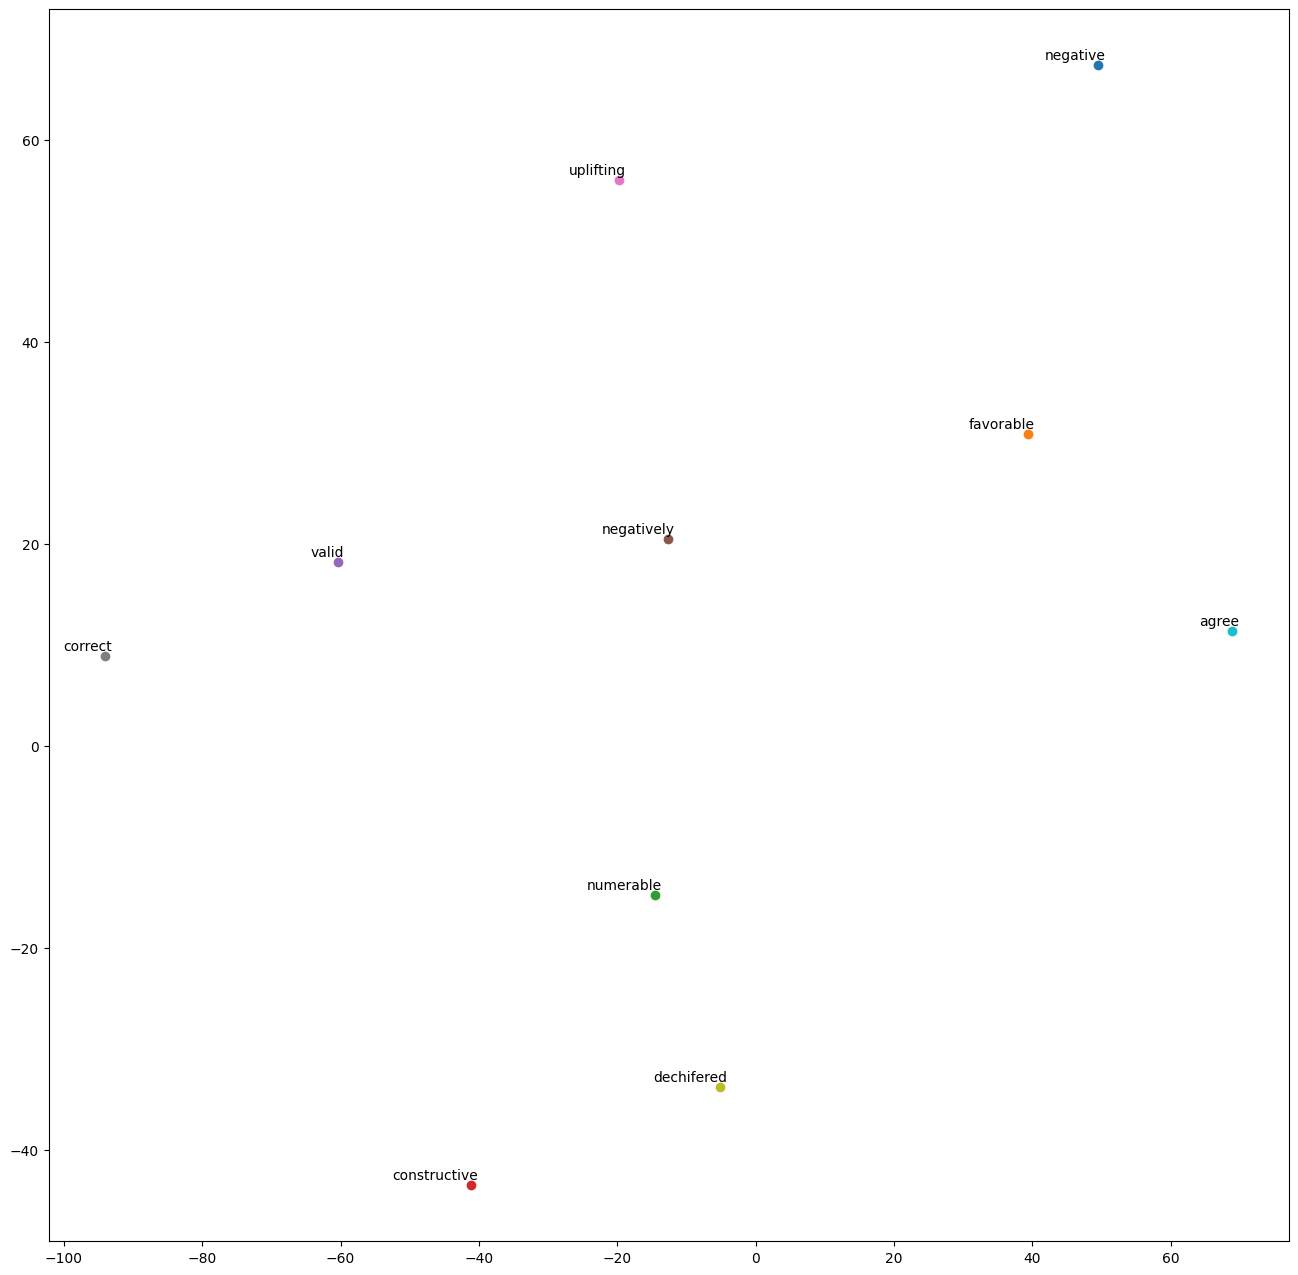

In [22]:
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import random

model = Word2Vec(df['preprocessed'], vector_size=100, window=7, min_count=1)

sentences=df['preprocessed']
model.train(sentences, total_examples=len(sentences), epochs=15)

# Visualize word embeddings using t-SNE for the closest words to a specific word
def tsne_plot(model, target_word):
    try:
        # Getting the top 10 similar words
        similar_words = model.wv.most_similar(target_word, topn=10)
        words = [word for word, _ in similar_words]
        vectors = np.array([model.wv[word] for word in words])  # Getting vectors for these words
        tsne_model = TSNE(perplexity=2, n_components=2, init='pca', n_iter=2500, random_state=23)
        new_values = tsne_model.fit_transform(vectors)

        plt.figure(figsize=(16, 16))
        for i, word in enumerate(words):
            plt.scatter(new_values[i][0], new_values[i][1])
            plt.annotate(word, xy=(new_values[i][0], new_values[i][1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
        plt.show()
    except KeyError:
        print(f"The word '{target_word}' is not in the vocabulary.")


# Example: visualize the 10 closest words to a given word, e.g., 'example'
tsne_plot(model, 'positive')


# GPT Classification

In [151]:
# ! pip install openai

In [275]:
text_200 = all_text[:200]

text = text_200[0][0]
text

"Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form."

In [271]:
from openai import OpenAI

file_openai_key = "./.env"
key = open(file_openai_key, "r").read().strip()

client = OpenAI(api_key=key)

def get_chat_completion(prompt):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        temperature=0,
        max_tokens=50,

        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content

prompt = f"""
    You will be provided with a review of a movie.  
    If the movie review have a positive sentiment write "pos"
    If the movie review have a negative sentiment write "neg"
    \"\"\"{text}\"\"\" 
    """

get_chat_completion(prompt)

'pos'

In [277]:
def get_response(prompt):
    failure = True
    failure_count = 0 
    while(failure):
        failure = False
        try:
            response = get_chat_completion(prompt)
        except:
            failure = True
            print("failed")
            time.sleep(60)
        failure_count =+1
        if failure_count > 100:
            return -1
    return response

In [279]:
corect_outputs = 0
incorrects = []
for text, sent, train_test in text_200:
    prompt = f"""
    You will be provided with a review of a movie.  
    If the movie review have a positive sentiment write "pos"
    If the movie review have a negative sentiment write "neg"
    \"\"\"{text}\"\"\" 
    """
    response = get_response(prompt)
    print(sent, response)
    if sent == response:
        corect_outputs += 1
    else:
        incorrects.append((text, sent))
        print("incorrect")
    time.sleep(1)

neg pos
incorrect
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg pos
incorrect
neg neg
neg pos
incorrect
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg pos
incorrect
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg
neg neg


In [283]:
# here is the accuracy on 200 reviews
corect_outputs / len(text_200)

0.965

In [284]:
incorrects

[("Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.",
  'neg'),
 ('From the first time I saw the box cover of the movie and the stretched out photography I thought this guy, this friend of the \'Scwarz\' must be like 6 foot or 6ft 2in. <br /><br />Not 5 feet tall. Not that, it\'s his fault. <br /><br />At any rating, I turned on the movie one cool night in Tucson, out on the second story-deck with a good cigar and let it roll. At that time my wife was having an affair and things were going down hill for me, so I needed a good diversion. But, as bad as the movie was...I totally enjoyed it, with a bottle of Merlot too, I might admit. <br /><br />Truly, I have watched this movie many times. It always makes me feel good!! It\'s not that it \'tries too hard\' to be cool or that \'It\'s so clo

# Discussion

Word2Vec is well-regarded for its ability to efficiently capture semantic and syntactic relationships within text, making it a powerful tool for tasks like synonym detection and analogy solving. Its architecture is straightforward, yet it struggles with out-of-vocabulary words and generates static embeddings that don’t adapt to context. In my project, I utilized Word2Vec for sentiment analysis across a dataset of 50,000 sentences. After deriving word vectors, I averaged them for each sentence to produce consistent sentence-level embeddings. Using these embeddings, I trained a logistic regression model on 25,000 sentences and tested it on another set of 25,000, achieving the best results with a window size of 7, vector size of 100, and 15 epochs.


I plotted the 10 words closest to 'positive' and examined their utility using t-SNE visualizations, interestingly observing that words like 'negative' and 'negatively' were also close. Interpreting these visualizations was challenging and required careful consideration to avoid misinterpretations. I chose the averaging method for vector aggregation because it struck a good balance between simplicity and computational efficiency, crucial for handling such a large dataset efficiently.

In a parallel experiment, I tested GPT on a smaller dataset of 200 sentences for sentiment analysis and noticed a significant improvement in accuracy. This highlights a key difference: while Word2Vec is excellent for extracting features in structured analysis, GPT excels in understanding and generating text based on broader contextual cues, though it demands more computational power. The decision to use Word2Vec or GPT depends on specific project requirements like computational availability and the complexity of the task.

References:
Data Acquisition MSDS-692 course notebooks.